In [1]:
%%capture
!mkdir squad
!wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json -O squad/train-v2.0.json

In [2]:
!git clone --depth 1 https://github.com/NguyenNhoTrung/NLP-project.git

Cloning into 'NLP-project'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 17 (delta 1), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (17/17), 865.78 KiB | 1.87 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import shutil
import os
import torch
os.chdir('/kaggle/working/NLP-project')
shutil.move('/kaggle/working/squad/train-v2.0.json', '/kaggle/working/NLP-project/squad')


'/kaggle/working/NLP-project/squad/train-v2.0.json'

In [4]:
os.getcwd()

'/kaggle/working/NLP-project'

In [5]:
!pip install transformers

In [6]:
!mkdir logs
!python train.py

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [7]:
def get_loss():
    train_losses = []
    val_losses = []
    for i in range(0,4):
        fullname = '/kaggle/working/NLP-project/logs/' + str(i)+ ".pt"
        checkpoint = torch.load(fullname)
        train_losses.append(checkpoint['loss_train'])
        val_losses.append(checkpoint['loss_val'])
    return train_losses, val_losses

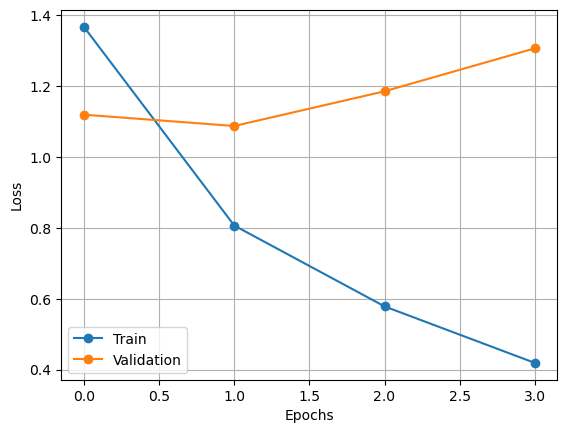

In [8]:
from visualize import plot_loss_vs_epochs
train_losses, val_losses = get_loss()
plot_loss_vs_epochs(train_losses, val_losses)